# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset

df = pd.read_csv(r'/Users/zhiyanghan/Downloads/USDC-USD.csv')
df = df[['Date', 'Adj Close']]
df.columns = ['date', 'price']
df = df.set_index('date')
df.head(10)

,price
date,
2018-10-28,1.011070
2018-10-29,1.008370
2018-10-30,1.004680
2018-10-31,0.996386
2018-11-01,0.992502
2018-11-02,0.999969
2018-11-03,1.003790
2018-11-04,0.997669
2018-11-05,0.998748


In [3]:
# Show The Number of Missing Values

nanum = df['price'].isna().sum()
print("The Number of Missing Values is", nanum)

The Number of Missing Values is 62


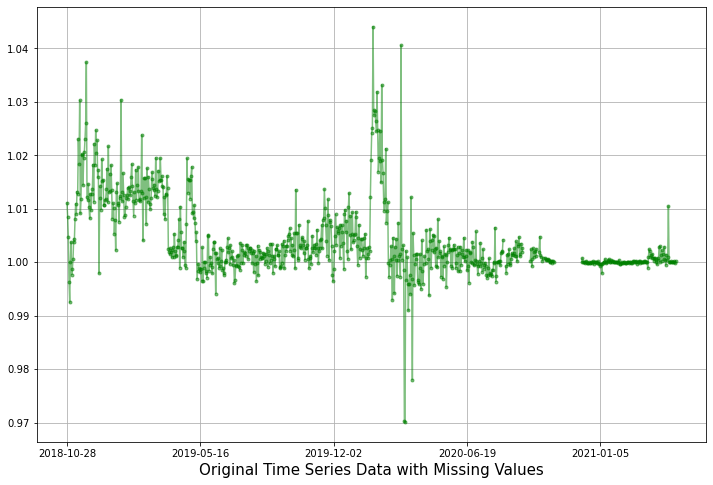

In [4]:
# Overview of the Original Dataset with Missing Values

plt.rcParams['figure.figsize'] = (12,8)
df['price'] = df['price'].astype('float64')
df['price'].plot(color = 'green', alpha=0.5, style=".-")
plt.xlabel('Original Time Series Data with Missing Values', size = 15)
plt.grid()
plt.show()

## Missing Value Imputation

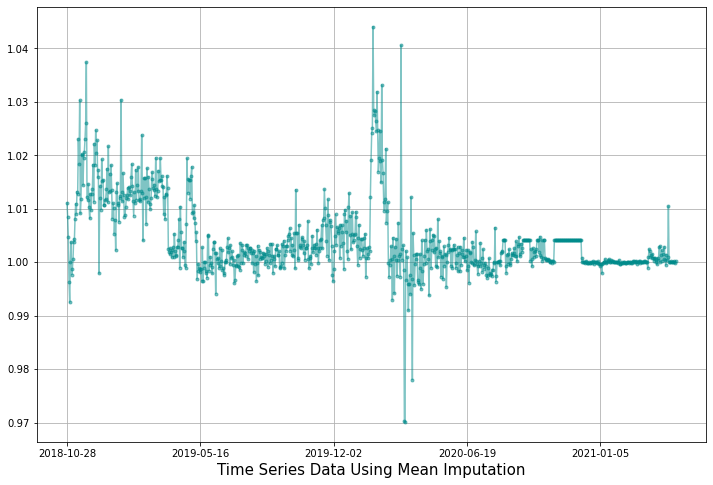

In [5]:
# SimpleImputer Imputation - Mean

plt.rcParams['figure.figsize'] = (12,8)
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df['price'].values.reshape(-1,1))
df1 = df.copy()
arr = list(imp_mean.transform(df1['price'].values.reshape(-1,1)))
arr1 = []
for i in range(len(arr)):
    arr1.append(arr[i][0])
df['SI_mean']=pd.Series(arr1, index=df.index)
df['SI_mean'].plot(color='darkcyan', alpha=0.5, style=".-")
plt.xlabel('Time Series Data Using Mean Imputation', size = 15)
plt.grid()
plt.show()

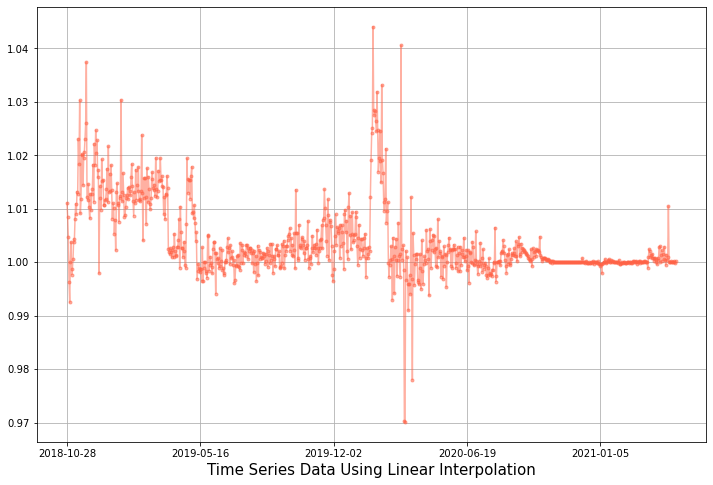

In [6]:
# Linear Interpolation

plt.rcParams['figure.figsize'] = (12,8)
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['price'])
f = interp1d(df_nona['rownum'], df_nona['price'])
df['linear_fill'] = f(df['rownum'])
df['linear_fill'].plot(color='tomato', alpha=0.5, style=".-")
plt.xlabel('Time Series Data Using Linear Interpolation', size = 15)
plt.grid()
plt.show()

## Inter-Day Outlier Detection

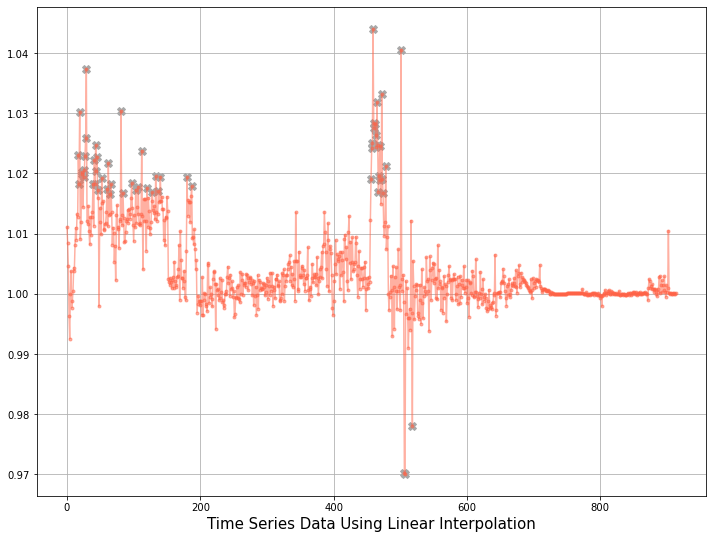

In [7]:
# Anomaly Detection Using Interquartile Range

q1, q3 = df['price'].quantile([0.25, 0.75])
iqr = q3 - q1

lower = q1 - (1.5*iqr)
upper = q3 + (1.5*iqr)

df = df.reset_index()
df['price_outlier'] = ((df['price']>upper) | (df['price']<lower)).astype('int')

outlier = df[df['price_outlier'] == 1]
plt.figure(figsize = (12,9))
plt.plot(outlier['linear_fill'], color = 'darkgray', label = 'outliers', marker = 'X', markersize = 8, ls = 'none')
df['linear_fill'].plot(color = 'tomato', label = 'normal', alpha = 0.5, style=".-")
plt.xlabel('Time Series Data Using Linear Interpolation', size = 15)
plt.grid()
plt.show()

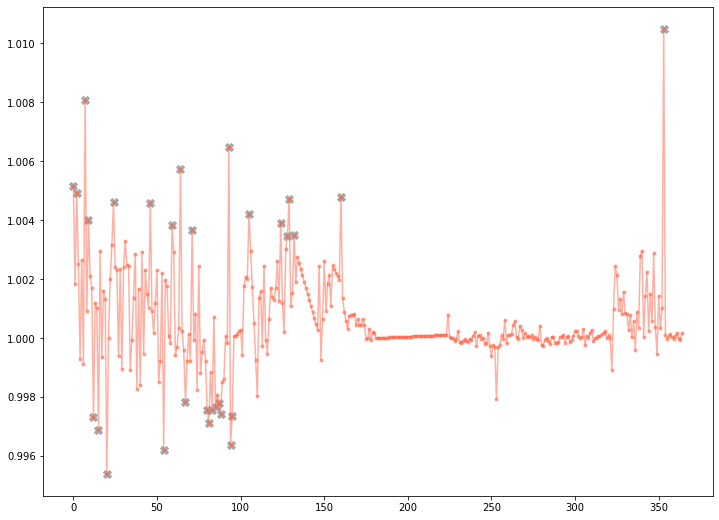

In [8]:
# Zoom In for the Recent Year

df = df.tail(365)

q1, q3 = df['price'].quantile([0.25, 0.75])
iqr = q3 - q1

lower = q1 - (1.5*iqr)
upper = q3 + (1.5*iqr)

df = df.reset_index()
df['price_outlier'] = ((df['price']>upper) | (df['price']<lower)).astype('int')

outliers = df[df['price_outlier'] == 1]
_ = plt.figure(figsize = (12,9))
_ = plt.plot(outliers['linear_fill'], color = 'darkgray', label = 'outliers', marker = 'X', markersize = 8, 
             ls = 'none')
df['linear_fill'].plot(color = 'tomato', label = 'normal', alpha = 0.5, style=".-")
plt.show()

## Intra-Day Outlier Detection

In [9]:
# Import Uniswap USDC/USDT Transaction Data on 2021/04/17

data = pd.read_csv(r'/Users/zhiyanghan/Downloads/sample_uniswap_record.csv')
data

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,id,pair,sender,timestamp,to
0,0.000000,13714.149586,13736.952600,0.000000,13719.908067,0x02423ff8524cf8c85cd529997350f05659f325e42ee3...,"{'token0': {'symbol': 'USDC'}, 'token1': {'sym...",0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1618628013,0xedf1fa564a91a5664f172470c47450af17724757
1,985.841844,0.000000,0.000000,981.233844,983.570380,0x0425cad4b3fb0a5a3dbae0139e7ce5f6568395b2232e...,"{'token0': {'symbol': 'USDC'}, 'token1': {'sym...",0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1618633323,0x4dfcb1482878ededccd6cc19f9d043cdd56ffd06
2,0.000000,1303.527006,1300.000000,0.000000,1301.994322,0x0463b5d6942a083514a9577f93c1165ebb94aa1a028f...,"{'token0': {'symbol': 'USDC'}, 'token1': {'sym...",0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1618689098,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc
3,0.000000,16227.894553,16224.883937,0.000000,16240.058011,0x048188d8dcef010150ad460ea27be994ee0b04ee07cc...,"{'token0': {'symbol': 'USDC'}, 'token1': {'sym...",0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1618636881,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc
4,0.000000,3694.017535,3705.729128,0.000000,3700.699377,0x04c2f99e921bcb18ad2e4bbb2369f72baebfefbe1712...,"{'token0': {'symbol': 'USDC'}, 'token1': {'sym...",0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1618676621,0x93936c7e1fea69cc471d617dc8feff92c53eae12
...,...,...,...,...,...,...,...,...,...,...
495,1404.873111,0.000000,0.000000,1395.637466,1400.756917,0xdd37fec102387ec64ff29260a41459836bf464b5becc...,"{'token0': {'symbol': 'USDC'}, 'token1': {'sym...",0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1618636458,0x9477861457123c55cd34c608068c58af2bff5dc8
496,3382.912435,0.000000,0.000000,3368.410503,3373.391859,0xde1eb2409dfc7b21c45546f5ee1ab4e0745d58600171...,"{'token0': {'symbol': 'USDC'}, 'token1': {'sym...",0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1618624331,0xf06371cfecd87065ec3aaf792252fe02305f0cb2
497,3373.264028,0.000000,0.000000,3366.603303,3371.401905,0xde2a85cc417d1bc47bbdcb33f15fb2250c39b2c2cd46...,"{'token0': {'symbol': 'USDC'}, 'token1': {'sym...",0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1618675232,0x745daa146934b27e3f0b6bff1a6e36b9b90fb131
498,2000.000000,0.000000,0.000000,1992.910242,1997.247465,0xde52cf7bcb11bab1f69c0c9d49404c767d3d16b513a7...,"{'token0': {'symbol': 'USDC'}, 'token1': {'sym...",0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1618695740,0x56fdb1a3e9ad1630061ac7ee60dd75ba78307036


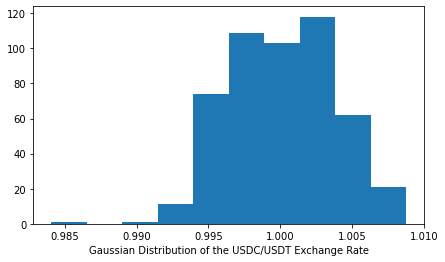

In [10]:
# Plot the Distribution of USDC/USDT Exchange Rates on 2021/04/17

data.columns = ['USDC In', 'USDC Out', 'USDT In', 'USDT Out', 'USD', 'ID', 'Pair', 'From', 'Time', 'To']
data['USDC/USDT Exchange Rate'] = np.nan
for i in range(len(data)):
    if data['USDC In'][i] == 0:
        data['USDC/USDT Exchange Rate'][i] = data['USDT In'][i]/data['USDC Out'][i]
    elif data['USDC Out'][i] == 0:
        data['USDC/USDT Exchange Rate'][i] = data['USDT Out'][i]/data['USDC In'][i]
data = data[['USDC In', 'USDC Out', 'USDT In', 'USDT Out', 'USDC/USDT Exchange Rate', 
             'USD', 'ID', 'Pair', 'From', 'Time', 'To']]

pd.set_option("display.max_rows", None)

plt.figure(figsize = (7,4))
plt.hist(data['USDC/USDT Exchange Rate'])
plt.xlabel('Gaussian Distribution of the USDC/USDT Exchange Rate')
plt.show()

In [11]:
# Intra-day Outlier Detection Using Standard Deviation

data_mean, data_std = np.mean(data['USDC/USDT Exchange Rate']), np.std(data['USDC/USDT Exchange Rate'])
cut_off = data_std * 3
lower, upper = data_mean -cut_off, data_mean + cut_off
outlier = [x for x in data['USDC/USDT Exchange Rate'] if x < lower or x > upper]

print('Outliers are:',outlier)
print('Transaction 1:', list(data['ID'][data['USDC/USDT Exchange Rate'] == 0.9890912025467159]))
print('Transaction 2:', list(data['ID'][data['USDC/USDT Exchange Rate'] == 0.9840470041646825]))

Outliers are: [0.9890912025467159, 0.9840470041646825]
Transaction 1: ['0x3101dd6f38b611270b629c705e4e543cb1f24ea889a41149c0fc92f97151cedd-0']
Transaction 2: ['0xcdfcfc11c62ff05f8876afb514c0b3a86d9a4062b9e40cd206f011a2ac1c3ba5-0']
